In [62]:
import numpy as np

archivo = "../data/ch_normal_dist.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

numero = []
cgal_ch_2 = []
cgal_graham_andrew = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []


with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()
    
    if len(datos) >= 17:
        numero.append(datos[0])
        cgal_ch_2.append([float(d) for d in datos[1:6]])
        cgal_graham_andrew.append([float(d) for d in datos[6:11]])
        cpu_manhattan.append([float(d) for d in datos[11:16]])
        cpu_euclidean.append([float(d) for d in datos[16:21]])
        gpu_scan.append([float(d) for d in datos[21:26]])
        cub_flagged.append([float(d) for d in datos[26:31]])
        thrust_scan.append([float(d) for d in datos[31:36]])
        thrust_copy.append([float(d) for d in datos[36:41]])

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Create a dictionary to map the legend labels to their respective colors
color_mapping = {
    'cgal_ch_2': '#1f77b4',  # Azul frío
    'cgal_graham_andrew': '#66c2a5',  # Verde azulado frío
    'cpu_manhattan': '#2ca02c',  # Verde
    'cpu_euclidean': '#d62728',  # Rojo
    'gpu_scan': '#9467bd',  # Morado
    'cub_flagged': '#8c564b',  # Marrón
    'thrust_scan': '#e377c2',  # Rosa claro
    'thrust_copy': '#7f7f7f',  # Gris
    'omp_euclidean': '#bcbd22',  # Amarillo verdoso
    'omp_manhattan': '#17becf',  # Turquesa
    'cudachain': 'black',  # Negro
    'qhull': '#ff7f0e'  # Naranja cálido
}



# Define line styles and markers for better visualization in black and white
line_styles = {
    'cgal_ch_2': '-',
    'cgal_graham_andrew': '--',
    'cpu_manhattan': '-.',
    'cpu_euclidean': ':',
    'gpu_scan': '-',
    'cub_flagged': '--',
    'thrust_copy': '-.',
    'thrust_scan': ':',
    'omp_euclidean': '-',
    'omp_manhattan': '--',
    'cudachain' : '-',
    'qhull' : '-.'
}

markers = { 'cgal_ch_2': 'o',
            'cgal_graham_andrew': '1',
            'cpu_manhattan': 'v',
            'cpu_euclidean': '^',
            'gpu_scan': '<',
            'cub_flagged': '>',
            'thrust_copy': 'p',
            'thrust_scan': '*',
            'omp_euclidean' : '2',
            'omp_manhattan' : '8',
            'cudachain' : 'x',
            'qhull' : 's'
}
  
marker_style = {
    #'markerfacecolor': 'none',
    #'markeredgecolor': 'black',
    'markersize': 6
} 


# Normal Distribution

## only filter

In [64]:
archivo = "../data/normal_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        numero.append(int(datos[0]))
        cpu_manhattan.append(float(datos[1]))
        #cpu_euclidean.append(float(datos[6]))
        gpu_scan.append(float(datos[11]))
        cub_flagged.append(float(datos[16]))
        thrust_scan.append(float(datos[21]))
        thrust_copy.append(float(datos[26]))
        
ruta = "../data/omp_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/omp_manhattan_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
        
ruta3 = "../data/cpu_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta3, "r") as f:
    lineas = f.readlines()
    
cpu_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        cpu_euclidean.append(float(datos[1]))
        

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cpu_euclidean = np.array(cpu_euclidean)
cpu_manhattan = cpu_euclidean / np.array(cpu_manhattan)
gpu_scan = cpu_euclidean / np.array(gpu_scan)
cub_flagged = cpu_euclidean / np.array(cub_flagged)
thrust_scan = cpu_euclidean / np.array(thrust_scan)
thrust_copy = cpu_euclidean / np.array(thrust_copy)
omp_manhattan = cpu_euclidean / np.array(omp_manhattan)
omp_euclidean = cpu_euclidean / np.array(omp_euclidean)



# Create a dictionary to map the legend labels to their respective arrays
legend_labels_normal = {
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan
}

# Sort the legend labels based on the maximum value in each array
sorted_labels_normal = sorted(legend_labels_normal, key=lambda x: np.max(legend_labels_normal[x]), reverse=True)

In [65]:
for i, label in enumerate(sorted_labels_normal):
    print(legend_labels_normal)


{'cpu_manhattan': array([1.03841379, 1.04120006, 1.03245538, 1.0306655 , 1.04021664,
       1.0332006 , 1.02909979, 1.0000345 , 1.02569291, 1.03766073,
       1.01941028, 1.02499647, 0.99496648, 0.99511379, 0.99895245,
       0.99296144, 0.99557617, 1.00023405, 1.03954362, 1.04398057,
       1.03877358, 1.03227157, 1.03723085, 1.03333805, 1.02807526,
       1.02618156, 1.02856338, 1.03124645, 0.99721533, 1.00623581,
       1.00459962, 1.00462655]), 'cpu_euclidean': array([  564.4992372,  1143.9313476,  1802.2675415,  2270.6065186,
        3017.0672363,  3807.6812745,  4739.2041015,  5013.2644531,
        6052.6918945,  6354.2507814,  7466.2112305,  8134.2925782,
       10026.2717774, 10149.9969727, 11593.234375 , 11594.9809571,
       13060.6669922, 13052.2414063, 11246.4756835, 11216.4150391,
       12491.9257811, 12234.71875  , 13643.013379 , 13364.7713869,
       14690.7106445, 14381.1369141, 15859.7724609, 15534.9893555,
       20206.0695314, 19730.4951171, 21667.4480469, 21067.869

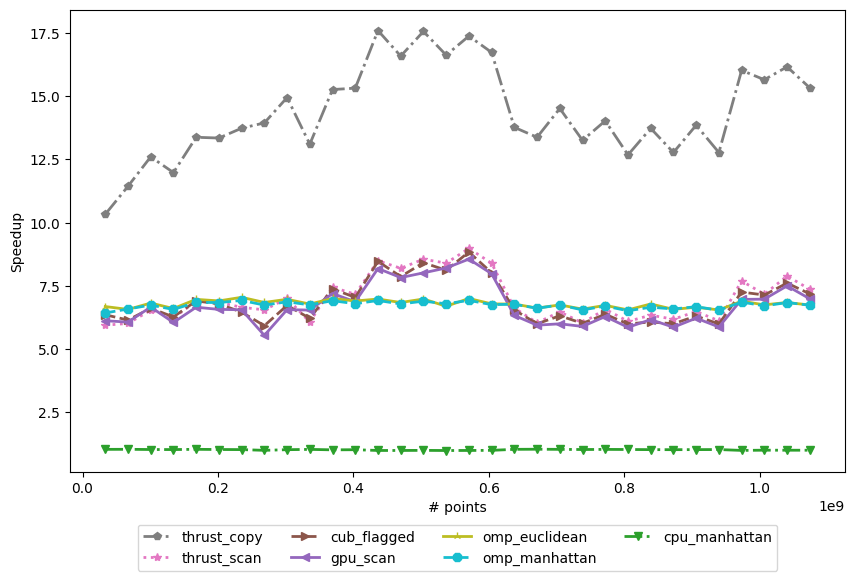

In [66]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_normal):
    if label != 'cpu_euclidean':
        y_values = legend_labels_normal[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

In [67]:
thrust_copy[len(thrust_copy)-1] / thrust_scan[len(thrust_scan)-1]

2.0812296152544185

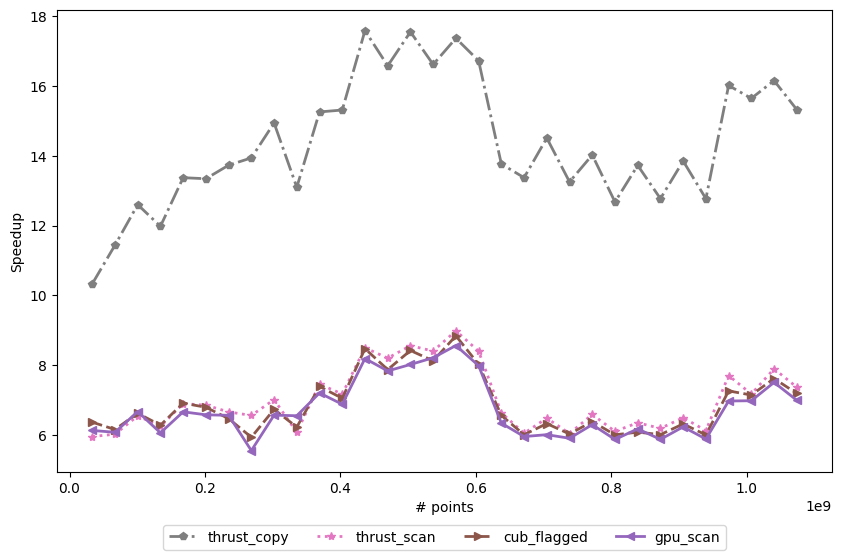

In [68]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_normal):
    if label != 'cpu_euclidean' and label != 'omp_euclidean' and label != 'omp_manhattan' and label != 'cpu_manhattan':
        y_values = legend_labels_normal[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

In [69]:
legend_labels_normal['thrust_copy']

array([10.32767498, 11.43633494, 12.59959354, 11.9770886 , 13.37266048,
       13.34231475, 13.73090126, 13.93996682, 14.94234065, 13.0980635 ,
       15.25865843, 15.31337181, 17.59151771, 16.58087215, 17.55558625,
       16.61968945, 17.37188011, 16.7266268 , 13.76499551, 13.37339414,
       14.51037737, 13.25265087, 14.02378578, 12.67642304, 13.72577712,
       12.77109888, 13.85055694, 12.7699266 , 16.01738928, 15.6473537 ,
       16.15757422, 15.32492034])

## filter + Convex hull

In [70]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_normal_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_graham_andrew = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(int(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_graham_andrew.append(float(datos[6]))
        cpu_manhattan.append(float(datos[11]))
        #cpu_euclidean.append(float(datos[16]))
        gpu_scan.append(float(datos[21]))
        cub_flagged.append(float(datos[26]))
        thrust_scan.append(float(datos[31]))
        thrust_copy.append(float(datos[36]))
        
ruta = "../data/ch_omp_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/ch_omp_manhattan_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
       
ruta3 = "../data/ch_cpu_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta3, "r") as f:
    lineas = f.readlines()
     
cpu_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cpu_euclidean.append(float(datos[1]))
        
ruta4 = "../data/ch_cudachain_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta4, "r") as f:
    lineas = f.readlines()
     
cudachain = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cudachain.append(float(datos[1]))
        
ruta5 = "../data/times_normal.txt"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta5, "r") as f:
    lineas = f.readlines()
     
qhull = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        qhull.append(float(datos[1]))

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cgal_ch_2 = np.array(cgal_ch_2)
cgal_graham_andrew = cgal_ch_2 / np.array(cgal_graham_andrew)
cpu_manhattan = cgal_ch_2 / np.array(cpu_manhattan)
cpu_euclidean = cgal_ch_2 / np.array(cpu_euclidean)
gpu_scan = cgal_ch_2 / np.array(gpu_scan)
cub_flagged = cgal_ch_2 / np.array(cub_flagged)
thrust_scan = cgal_ch_2 / np.array(thrust_scan)
thrust_copy = cgal_ch_2 / np.array(thrust_copy)
omp_manhattan = cgal_ch_2 / np.array(omp_manhattan)
omp_euclidean = cgal_ch_2 / np.array(omp_euclidean)
cudachain = cgal_ch_2 / np.array(cudachain)
qhull = cgal_ch_2[:len(qhull)] / np.array(qhull)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_normal = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_graham_andrew': cgal_graham_andrew,   
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan,
    'cudachain' : cudachain,
    'qhull' : qhull
}         
            
# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_normal = sorted(legend_labels_ch_normal, key=lambda x: np.max(legend_labels_ch_normal[x]), reverse=True)

In [71]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_normal_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_graham_andrew = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(int(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_graham_andrew.append(float(datos[6]))
        cpu_manhattan.append(float(datos[11]))
        #cpu_euclidean.append(float(datos[16]))
        gpu_scan.append(float(datos[21]))
        cub_flagged.append(float(datos[26]))
        thrust_scan.append(float(datos[31]))
        thrust_copy.append(float(datos[36]))
        
ruta = "../data/ch_omp_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/ch_omp_manhattan_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
       
ruta3 = "../data/ch_cpu_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta3, "r") as f:
    lineas = f.readlines()
     
cpu_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cpu_euclidean.append(float(datos[1]))
        
ruta4 = "../data/ch_cudachain_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta4, "r") as f:
    lineas = f.readlines()
     
cudachain = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cudachain.append(float(datos[1]))
        
ruta5 = "../data/times_normal.txt"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta5, "r") as f:
    lineas = f.readlines()
     
qhull = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        qhull.append(float(datos[1]))

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cpu_euclidean = np.array(cpu_euclidean)
cgal_ch_2 = cpu_euclidean / np.array(cgal_ch_2)
cgal_graham_andrew = cpu_euclidean / np.array(cgal_graham_andrew)
cpu_manhattan = cpu_euclidean / np.array(cpu_manhattan)
gpu_scan = cpu_euclidean / np.array(gpu_scan)
cub_flagged = cpu_euclidean / np.array(cub_flagged)
thrust_scan = cpu_euclidean / np.array(thrust_scan)
thrust_copy = cpu_euclidean / np.array(thrust_copy)
omp_manhattan = cpu_euclidean / np.array(omp_manhattan)
omp_euclidean = cpu_euclidean / np.array(omp_euclidean)
cudachain = cpu_euclidean / np.array(cudachain)
qhull = cpu_euclidean[:len(qhull)] / np.array(qhull)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_normal_e = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_graham_andrew': cgal_graham_andrew,   
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan,
    'cudachain' : cudachain,
    'qhull' : qhull
}         
            
# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_normal_e = sorted(legend_labels_ch_normal_e, key=lambda x: np.max(legend_labels_ch_normal_e[x]), reverse=True)

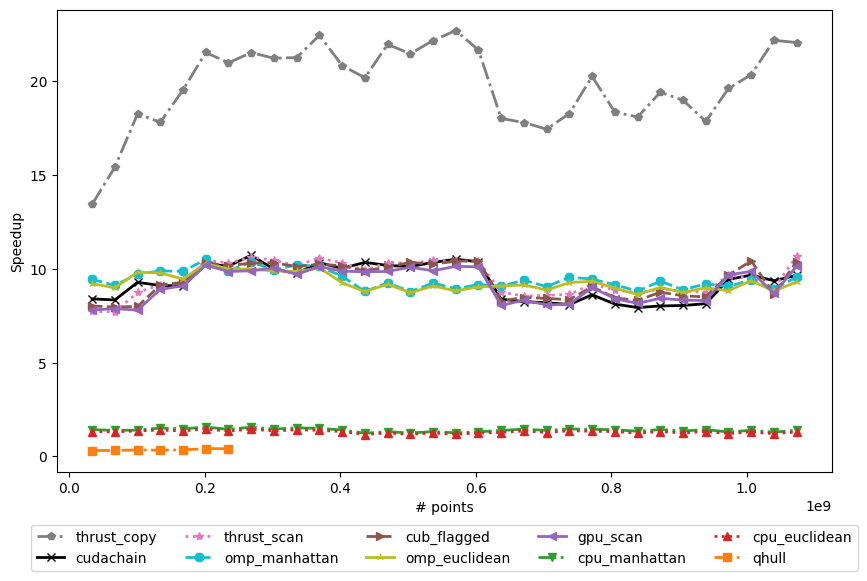

In [72]:
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_normal):
    if label != 'cgal_ch_2' and label != 'cgal_graham_andrew':
        y_values = legend_labels_ch_normal[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)
plt.show()


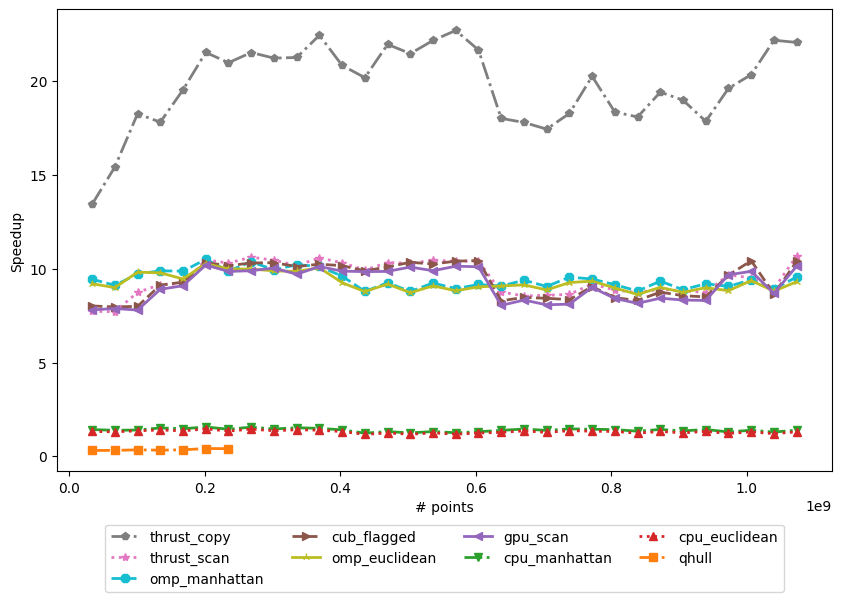

In [73]:
# Plot the arrays in the desired order with segmented lines and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_normal):
    if label != 'cgal_ch_2' and label != 'cgal_graham_andrew' and 'cudachain' != label:
        y_values = legend_labels_ch_normal[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

#label != 'omp_euclidean' and label != 'omp_manhattan' and label != 'cpu_manhattan' and label != 'cpu_euclidean' and
plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)  

# save pdf file


plt.show()

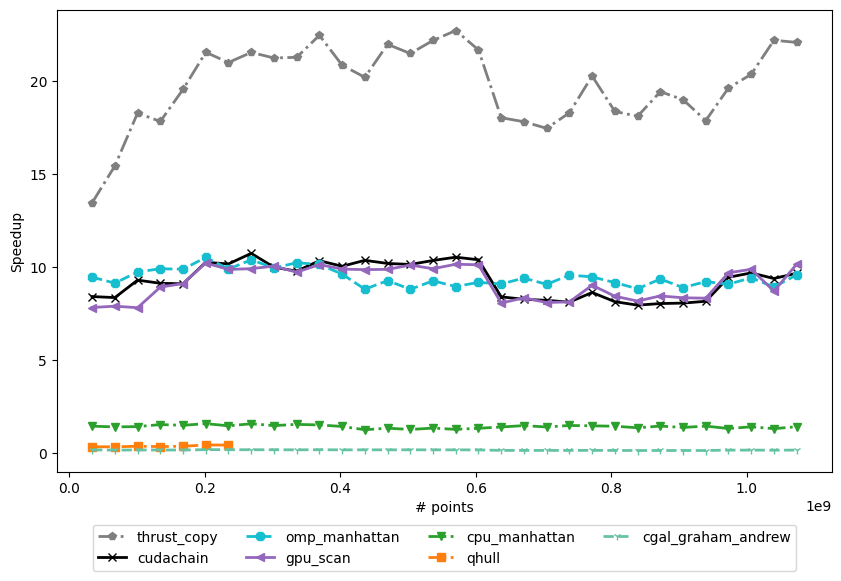

In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_normal):
    if label != 'cub_flagged' and label != 'thrust_scan' and label != 'cgal_ch_2' and label != 'cpu_euclidean' and label != 'omp_euclidean':
        y_values = legend_labels_ch_normal[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')

# Legend at the bottom of the figure
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()


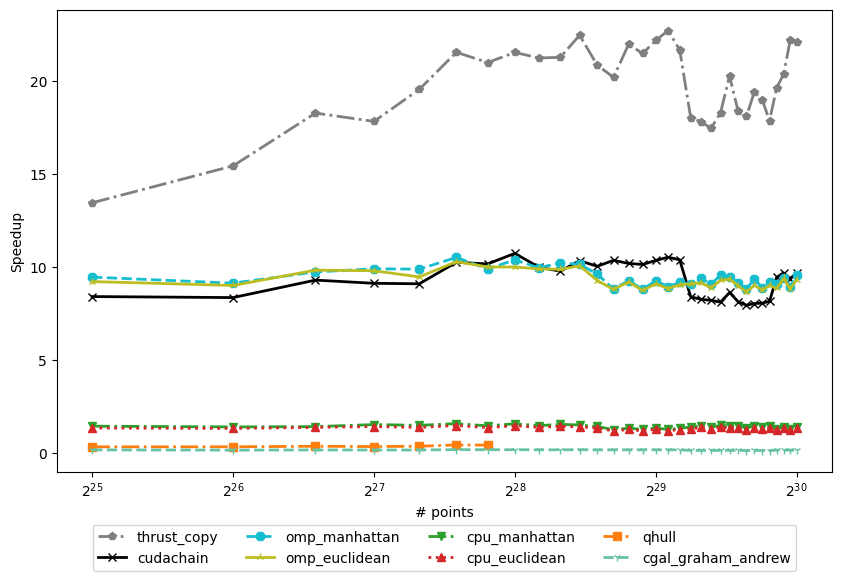

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_normal):
    if label != 'cub_flagged' and label != 'thrust_scan' and label != 'gpu_scan' and label != 'cgal_ch_2':
        y_values = legend_labels_ch_normal[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')

# Legend at the bottom of the figure
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.xscale('log', base=2)

plt.show()


NOTA para el 4to comentatio: cambiar el eje x para que sea potencia de 2, no es bueno porque los puntos estan sampleados linealmente, al dejar el eje x en logaritmico va a confundir al lector ya que deja esos espacio y acumula todo al final

In [76]:
ruta = "../data/ch_omp_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean_filter = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_euclidean_filter.append(datos)
        
#print (omp_euclidean)

ruta2 = "../data/ch_omp_manhattan_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan_filter = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_manhattan_filter.append(datos)
        
#print(omp_euclidean_filter[::6])
#print(omp_manhattan[::6])
#print(numero[::6])

a = numero[::6]
b = omp_euclidean_filter[::6]
c = omp_manhattan[::6]

print (a)
print (b)
print (b)

val = 6

import pandas as pd

data = {'Numero': numero[::val], 'Euclidean': omp_euclidean_filter[::val], 'Manhattan': omp_manhattan_filter[::val]}
df = pd.DataFrame(data)

# Exportar la tabla a un archivo LaTeX
tabla_latex = df.to_latex(index=False)

# Guardar la tabla en un archivo
#with open('tabla.tex', 'w') as file:
#    file.write(tabla_latex)

# Imprimir la tabla en la consola
print(tabla_latex)

[  33554432  234881024  436207616  637534208  838860800 1040187392]
[['33554432', '85.3028459001', '2.7025195186', '.8546117100', '135', '17'], ['234881024', '664.0917237000', '2.5093287738', '.7935194323', '122', '23'], ['436207616', '1418.4790770999', '25.3264221843', '8.0089179087', '164', '21'], ['637534208', '1647.4293578998', '37.0476456565', '11.7154942223', '311', '22'], ['838860800', '2199.8451658001', '67.8245428478', '21.4480036663', '336', '22'], ['1040187392', '3145.9874756999', '55.6190510778', '17.5882882706', '260', '23']]
[['33554432', '85.3028459001', '2.7025195186', '.8546117100', '135', '17'], ['234881024', '664.0917237000', '2.5093287738', '.7935194323', '122', '23'], ['436207616', '1418.4790770999', '25.3264221843', '8.0089179087', '164', '21'], ['637534208', '1647.4293578998', '37.0476456565', '11.7154942223', '311', '22'], ['838860800', '2199.8451658001', '67.8245428478', '21.4480036663', '336', '22'], ['1040187392', '3145.9874756999', '55.6190510778', '17.58828

In [77]:
def generate_latex_table(data):
    table = "\\begin{tabular}{|c|c|c|c|c|c|c|c|}\n"
    table += "\\hline\n"
    table += "a & \\% filtrado & puntos en el hull & speedup filtro & speedup hull & b & \\% filtrado & puntos en el hull & speedup filtro & speedup hull \\\\\n"
    table += "\\hline\n"
    
    for i, item in enumerate(data):
        row = str(a[i]) + " & " + str(item[4]) + " & " + str(item[5]) + " & " + item[1] + " & " + item[2] + " & "
        
        if i < len(data) - 1:
            row += str(b[i][0]) + " & " + str(b[i][4]) + " & " + str(b[i][5]) + " & " + b[i][1] + " & " + b[i][2] + " \\\\\n"
        else:
            row += " &  &  &  &  \\\\\n"
        
        table += "\\hline\n"
        table += row
    
    table += "\\end{tabular}"
    return table

latex_table = generate_latex_table(b)

print(latex_table)

\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
a & \% filtrado & puntos en el hull & speedup filtro & speedup hull & b & \% filtrado & puntos en el hull & speedup filtro & speedup hull \\
\hline
\hline
33554432 & 135 & 17 & 85.3028459001 & 2.7025195186 & 33554432 & 135 & 17 & 85.3028459001 & 2.7025195186 \\
\hline
234881024 & 122 & 23 & 664.0917237000 & 2.5093287738 & 234881024 & 122 & 23 & 664.0917237000 & 2.5093287738 \\
\hline
436207616 & 164 & 21 & 1418.4790770999 & 25.3264221843 & 436207616 & 164 & 21 & 1418.4790770999 & 25.3264221843 \\
\hline
637534208 & 311 & 22 & 1647.4293578998 & 37.0476456565 & 637534208 & 311 & 22 & 1647.4293578998 & 37.0476456565 \\
\hline
838860800 & 336 & 22 & 2199.8451658001 & 67.8245428478 & 838860800 & 336 & 22 & 2199.8451658001 & 67.8245428478 \\
\hline
1040187392 & 260 & 23 & 3145.9874756999 & 55.6190510778 &  &  &  &  &  \\
\end{tabular}


# Uniform Distribution

## Only filter

In [78]:
archivo = "../data/uniform_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        numero.append(int(datos[0]))
        cpu_manhattan.append(float(datos[1]))
        #cpu_euclidean.append(float(datos[6]))
        gpu_scan.append(float(datos[11]))
        cub_flagged.append(float(datos[16]))
        thrust_scan.append(float(datos[21]))
        thrust_copy.append(float(datos[26]))
        
ruta = "../data/omp_euclidean_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/omp_manhattan_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
        
ruta3 = "../data/cpu_euclidean_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta3, "r") as f:
    lineas = f.readlines()
    
cpu_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        cpu_euclidean.append(float(datos[1]))
        

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cpu_euclidean = np.array(cpu_euclidean)
cpu_manhattan = cpu_euclidean / np.array(cpu_manhattan)
gpu_scan = cpu_euclidean / np.array(gpu_scan)
cub_flagged = cpu_euclidean / np.array(cub_flagged)
thrust_scan = cpu_euclidean / np.array(thrust_scan)
thrust_copy = cpu_euclidean / np.array(thrust_copy)
omp_manhattan = cpu_euclidean / np.array(omp_manhattan)
omp_euclidean = cpu_euclidean / np.array(omp_euclidean)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_uniform = {
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan
}

# Sort the legend labels based on the maximum value in each array
sorted_labels_uniform = sorted(legend_labels_uniform, key=lambda x: np.max(legend_labels_uniform[x]), reverse=True)

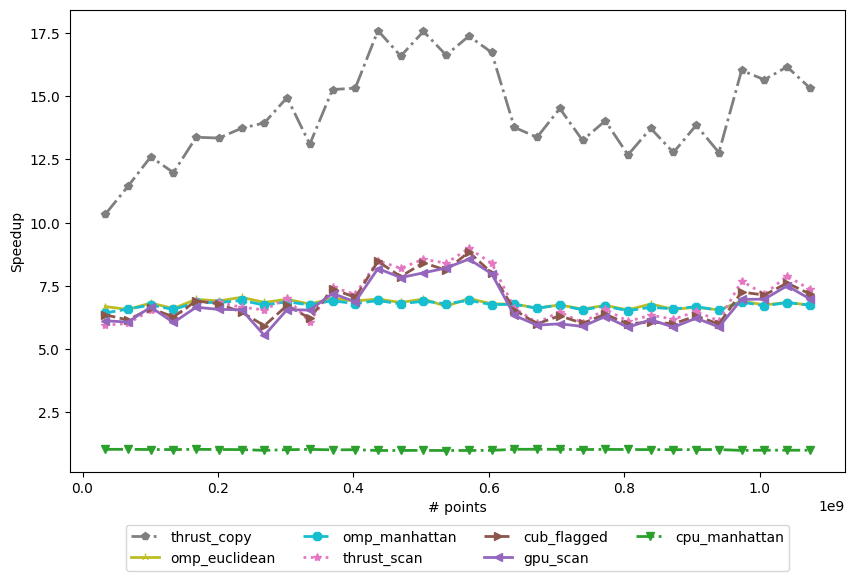

In [79]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_uniform):
    if label != 'cpu_euclidean':
        y_values = legend_labels_normal[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

## Filter + Convex Hull

In [80]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_uniform_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_graham_andrew = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(int(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_graham_andrew.append(float(datos[6]))
        cpu_manhattan.append(float(datos[11]))
        #cpu_euclidean.append(float(datos[16]))
        gpu_scan.append(float(datos[21]))
        cub_flagged.append(float(datos[26]))
        thrust_scan.append(float(datos[31]))
        thrust_copy.append(float(datos[36]))
        
ruta = "../data/ch_omp_euclidean_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/ch_omp_manhattan_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
       
ruta3 = "../data/ch_cpu_euclidean_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta3, "r") as f:
    lineas = f.readlines()
     
cpu_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cpu_euclidean.append(float(datos[1]))
        
ruta4 = "../data/ch_cudachain_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta4, "r") as f:
    lineas = f.readlines()
     
cudachain = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cudachain.append(float(datos[1]))
        
ruta5 = "../data/times_uniform.txt"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta5, "r") as f:
    lineas = f.readlines()
     
qhull = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        qhull.append(float(datos[1]))

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cgal_ch_2 = np.array(cgal_ch_2)
cgal_graham_andrew = cgal_ch_2[:len(cgal_graham_andrew)] / np.array(cgal_graham_andrew)
cpu_manhattan = cgal_ch_2[:len(cpu_manhattan)] / np.array(cpu_manhattan)
cpu_euclidean = cgal_ch_2[:len(cpu_euclidean)] / np.array(cpu_euclidean)
gpu_scan = cgal_ch_2[:len(gpu_scan)] / np.array(gpu_scan)
cub_flagged = cgal_ch_2[:len(cub_flagged)] / np.array(cub_flagged)
thrust_scan = cgal_ch_2[:len(thrust_scan)] / np.array(thrust_scan)
thrust_copy = cgal_ch_2[:len(thrust_copy)] / np.array(thrust_copy)
omp_manhattan = cgal_ch_2[:len(omp_manhattan)] / np.array(omp_manhattan)
omp_euclidean = cgal_ch_2[:len(omp_euclidean)] / np.array(omp_euclidean)
cudachain = cgal_ch_2[:len(cudachain)] / np.array(cudachain)
qhull = cgal_ch_2[:len(qhull)] / np.array(qhull)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_uniform = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_graham_andrew': cgal_graham_andrew,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan,
    'cudachain' : cudachain,
    'qhull' : qhull
}         
            
# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_uniform = sorted(legend_labels_ch_uniform, key=lambda x: np.max(legend_labels_ch_uniform[x]), reverse=True)

In [81]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_uniform_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_graham_andrew = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(int(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_graham_andrew.append(float(datos[6]))
        cpu_manhattan.append(float(datos[11]))
        #cpu_euclidean.append(float(datos[16]))
        gpu_scan.append(float(datos[21]))
        cub_flagged.append(float(datos[26]))
        thrust_scan.append(float(datos[31]))
        thrust_copy.append(float(datos[36]))
        
ruta = "../data/ch_omp_euclidean_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/ch_omp_manhattan_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
       
ruta3 = "../data/ch_cpu_euclidean_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta3, "r") as f:
    lineas = f.readlines()
     
cpu_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cpu_euclidean.append(float(datos[1]))
        
ruta4 = "../data/ch_cudachain_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta4, "r") as f:
    lineas = f.readlines()
     
cudachain = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cudachain.append(float(datos[1]))
        
ruta5 = "../data/times_uniform.txt"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta5, "r") as f:
    lineas = f.readlines()
     
qhull = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        qhull.append(float(datos[1]))

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cpu_euclidean = np.array(cpu_euclidean)
cgal_ch_2 = cpu_euclidean[:len(cgal_ch_2)] /  np.array(cgal_ch_2)
cgal_graham_andrew = cpu_euclidean[:len(cgal_graham_andrew)] / np.array(cgal_graham_andrew)
cpu_manhattan = cpu_euclidean[:len(cpu_manhattan)] / np.array(cpu_manhattan)
gpu_scan = cpu_euclidean[:len(gpu_scan)] / np.array(gpu_scan)
cub_flagged = cpu_euclidean[:len(cub_flagged)] / np.array(cub_flagged)
thrust_scan = cpu_euclidean[:len(thrust_scan)] / np.array(thrust_scan)
thrust_copy = cpu_euclidean[:len(thrust_copy)] / np.array(thrust_copy)
omp_manhattan = cpu_euclidean[:len(omp_manhattan)] / np.array(omp_manhattan)
omp_euclidean = cpu_euclidean[:len(omp_euclidean)] / np.array(omp_euclidean)
cudachain = cpu_euclidean[:len(cudachain)] / np.array(cudachain)
qhull = cpu_euclidean[:len(qhull)] / np.array(qhull)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_uniform_e = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_graham_andrew': cgal_graham_andrew,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan,
    'cudachain' : cudachain,
    'qhull' : qhull
}         
            
# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_uniform_e = sorted(legend_labels_ch_uniform_e, key=lambda x: np.max(legend_labels_ch_uniform[x]), reverse=True)

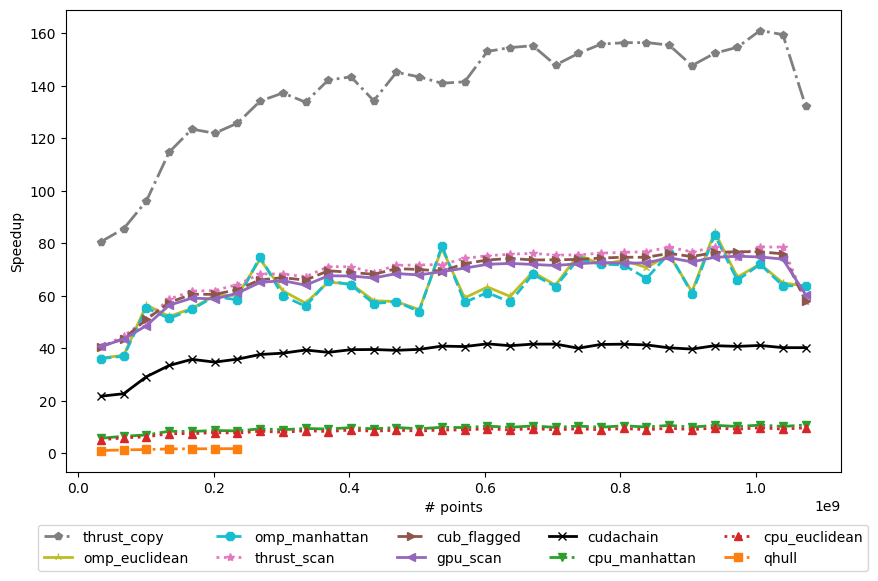

In [82]:
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_uniform):
    if label != 'cgal_ch_2' and label != 'cgal_graham_andrew':
        y_values = legend_labels_ch_uniform[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)
plt.show()


# Circumference Distribution

## Filter

In [83]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/circumference_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        numero.append(int(datos[0]))
        cpu_manhattan.append(float(datos[1]))
        cpu_euclidean.append(float(datos[6]))
        gpu_scan.append(float(datos[11]))
        cub_flagged.append(float(datos[16]))
        thrust_scan.append(float(datos[21]))
        thrust_copy.append(float(datos[26]))
        
ruta = "../data/omp_euclidean_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/omp_manhattan_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
        

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cpu_euclidean = np.array(cpu_euclidean)
cpu_manhattan = cpu_euclidean / np.array(cpu_manhattan)
gpu_scan = cpu_euclidean / np.array(gpu_scan)
cub_flagged = cpu_euclidean / np.array(cub_flagged)
thrust_scan = cpu_euclidean / np.array(thrust_scan)
thrust_copy = cpu_euclidean / np.array(thrust_copy)
omp_manhattan = cpu_euclidean / np.array(omp_manhattan)
omp_euclidean = cpu_euclidean / np.array(omp_euclidean)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_circumference = {
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan
}


# Sort the legend labels based on the maximum value in each array
sorted_labels_circumference = sorted(legend_labels_circumference, key=lambda x: np.max(legend_labels_circumference[x]), reverse=True)

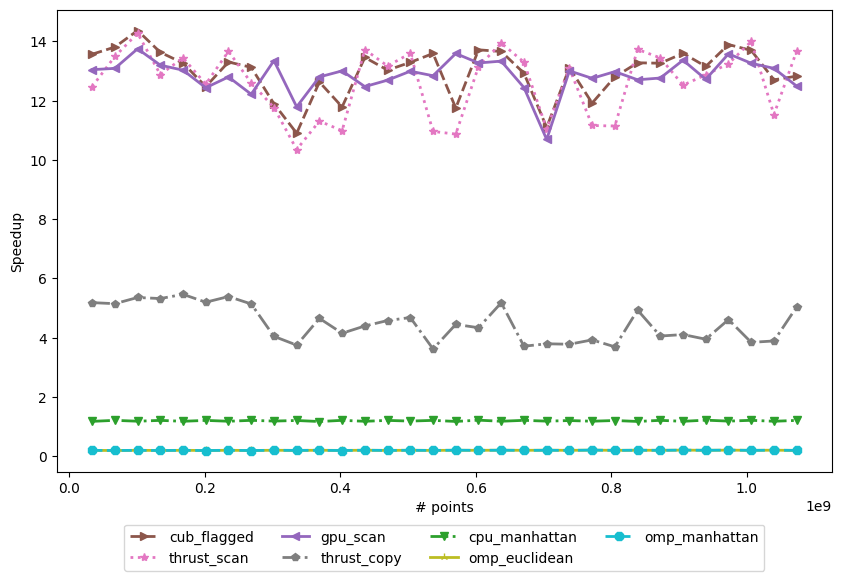

In [84]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_circumference):
    if label != 'cpu_euclidean':
        y_values = legend_labels_circumference[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)
plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

In [85]:
thrust_scan[len(thrust_scan)-1] / thrust_copy[len(thrust_copy)-1]

2.713717560466276

## Filter + Convex Hull

In [86]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_circumference_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_graham_andrew = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []
omp_euclidean = []
omp_manhattan = []
cudachain = []
qhull = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(int(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_graham_andrew.append(float(datos[6]))
        cpu_manhattan.append(float(datos[11]))
        cpu_euclidean.append(float(datos[16]))
        gpu_scan.append(float(datos[21]))
        cub_flagged.append(float(datos[26]))
        thrust_scan.append(float(datos[31]))
        thrust_copy.append(float(datos[36]))
        
ruta = "../data/ch_omp_euclidean_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/ch_omp_manhattan_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
        
ruta3 = "../data/ch_cpu_euclidean_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta3, "r") as f:
    lineas = f.readlines()
     
cpu_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cpu_euclidean.append(float(datos[1]))

'''        
ruta4 = "../data/ch_cudachain_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta4, "r") as f:
    lineas = f.readlines()
     

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cudachain.append(float(datos[1]))
'''

ruta5 = "../data/times_circumference.txt"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta5, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        qhull.append(float(datos[1]))

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cgal_ch_2 = np.array(cgal_ch_2)
cgal_graham_andrew = cgal_ch_2[:len(cgal_graham_andrew)] / np.array(cgal_graham_andrew)
cpu_manhattan = cgal_ch_2[:len(cpu_manhattan)] / np.array(cpu_manhattan)
cpu_euclidean = cgal_ch_2[:len(cpu_euclidean)] / np.array(cpu_euclidean)
gpu_scan = cgal_ch_2[:len(gpu_scan)] / np.array(gpu_scan)
cub_flagged = cgal_ch_2[:len(cub_flagged)] / np.array(cub_flagged)
thrust_scan = cgal_ch_2[:len(thrust_scan)] / np.array(thrust_scan)
thrust_copy = cgal_ch_2[:len(thrust_copy)] / np.array(thrust_copy)
omp_manhattan = cgal_ch_2[:len(omp_manhattan)] / np.array(omp_manhattan)
omp_euclidean = cgal_ch_2[:len(omp_euclidean)] / np.array(omp_euclidean)
#cudachain = cgal_ch_2[:len(cudachain)] / np.array(cudachain)
qhull = cgal_ch_2[:len(qhull)] / np.array(qhull)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_circumference = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_graham_andrew': cgal_graham_andrew,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan,
    #'cudachain' : cudachain,
    'qhull' : qhull
}         
            
# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_circumference = sorted(legend_labels_ch_circumference, key=lambda x: np.max(legend_labels_ch_circumference[x]), reverse=True)

In [87]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_circumference_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_graham_andrew = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []
omp_euclidean = []
omp_manhattan = []
cudachain = []
qhull = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(int(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_graham_andrew.append(float(datos[6]))
        cpu_manhattan.append(float(datos[11]))
        cpu_euclidean.append(float(datos[16]))
        gpu_scan.append(float(datos[21]))
        cub_flagged.append(float(datos[26]))
        thrust_scan.append(float(datos[31]))
        thrust_copy.append(float(datos[36]))
        
ruta = "../data/ch_omp_euclidean_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/ch_omp_manhattan_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
        
ruta3 = "../data/ch_cpu_euclidean_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta3, "r") as f:
    lineas = f.readlines()
     
cpu_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cpu_euclidean.append(float(datos[1]))

'''        
ruta4 = "../data/ch_cudachain_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta4, "r") as f:
    lineas = f.readlines()
     

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cudachain.append(float(datos[1]))
'''

ruta5 = "../data/times_circumference.txt"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta5, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        qhull.append(float(datos[1]))

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cpu_euclidean = np.array(cpu_euclidean)
cgal_ch_2 = cpu_euclidean[:len(cgal_ch_2)] /  np.array(cgal_ch_2[:len(cpu_euclidean)])
cgal_graham_andrew = cpu_euclidean[:len(cgal_graham_andrew)] / np.array(cgal_graham_andrew[:len(cpu_euclidean)])
cpu_manhattan = cpu_euclidean[:len(cpu_manhattan)] / np.array(cpu_manhattan[:len(cpu_euclidean)])
gpu_scan = cpu_euclidean[:len(gpu_scan)] / np.array(gpu_scan[:len(cpu_euclidean)])
cub_flagged = cpu_euclidean[:len(cub_flagged)] / np.array(cub_flagged[:len(cpu_euclidean)])
thrust_scan = cpu_euclidean[:len(thrust_scan)] / np.array(thrust_scan[:len(cpu_euclidean)])
thrust_copy = cpu_euclidean[:len(thrust_copy)] / np.array(thrust_copy[:len(cpu_euclidean)])
omp_manhattan = cpu_euclidean[:len(omp_manhattan)] / np.array(omp_manhattan[:len(cpu_euclidean)])
omp_euclidean = cpu_euclidean[:len(omp_euclidean)] / np.array(omp_euclidean[:len(cpu_euclidean)])
#cudachain = cpu_euclidean[:len(cudachain)] / np.array(cudachain[:len(cpu_euclidean)])
qhull = cpu_euclidean[:len(qhull)] / np.array(qhull)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_circumference_e = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_graham_andrew': cgal_graham_andrew,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan,
    #'cudachain' : cudachain,
    'qhull' : qhull
}         
            
# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_circumference_e = sorted(legend_labels_ch_circumference_e, key=lambda x: np.max(legend_labels_ch_circumference_e[x]), reverse=True)

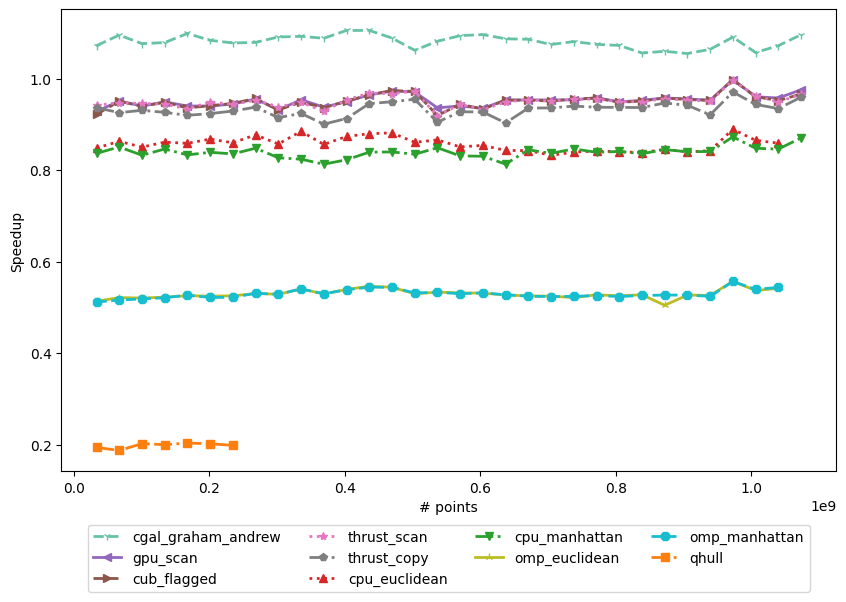

In [88]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference):
    if label != 'cgal_ch_2' and label != 'cudachain':
        y_values = legend_labels_ch_circumference[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

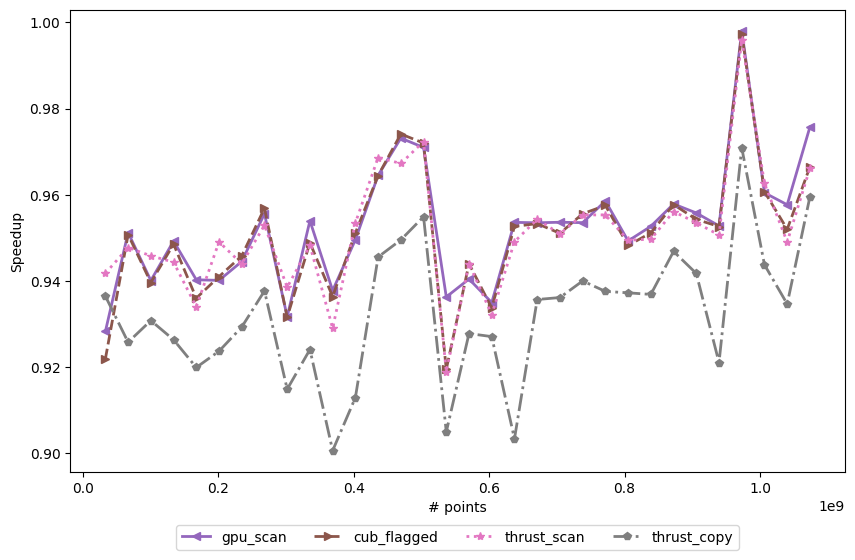

In [89]:
# Plot the arrays in the desired order with segmented lines and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference):
    if label != 'omp_euclidean' and label != 'omp_manhattan' and label != 'cgal_ch_2' and label != 'cgal_graham_andrew' and label != 'cpu_manhattan' and label != 'cpu_euclidean' and label != 'qhull':
        y_values = legend_labels_ch_circumference[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

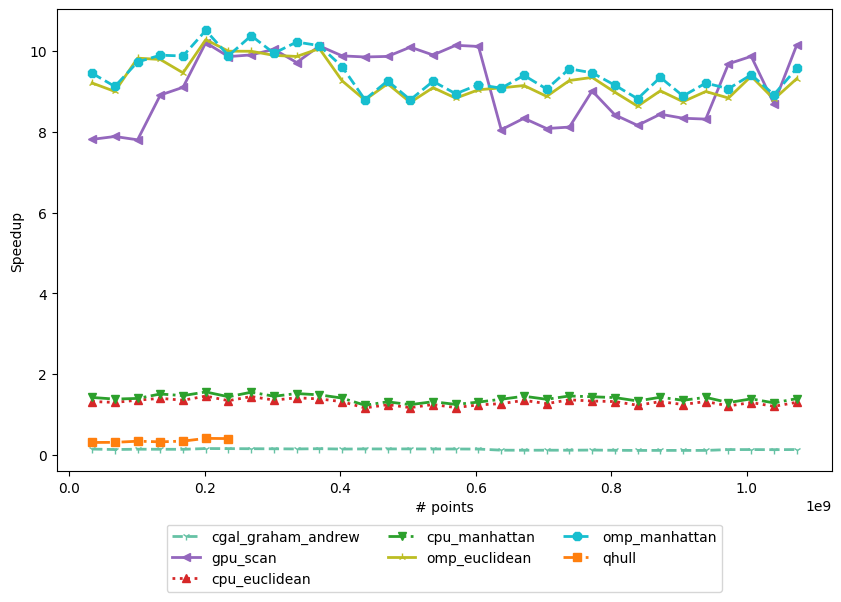

In [90]:
# Plot the arrays in the desired order with segmented lines and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference):
    if label != 'cub_flagged' and label != 'thrust_scan' and label != 'thrust_copy' and label != 'cgal_ch_2':
        y_values = legend_labels_ch_normal[label]
        x_values = numero[:len(y_values)]
        plt.plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)

#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [91]:
thrust_copy[len(thrust_copy)-1] / thrust_scan[len(thrust_scan)-1]

0.9848235231048199

# Subplots

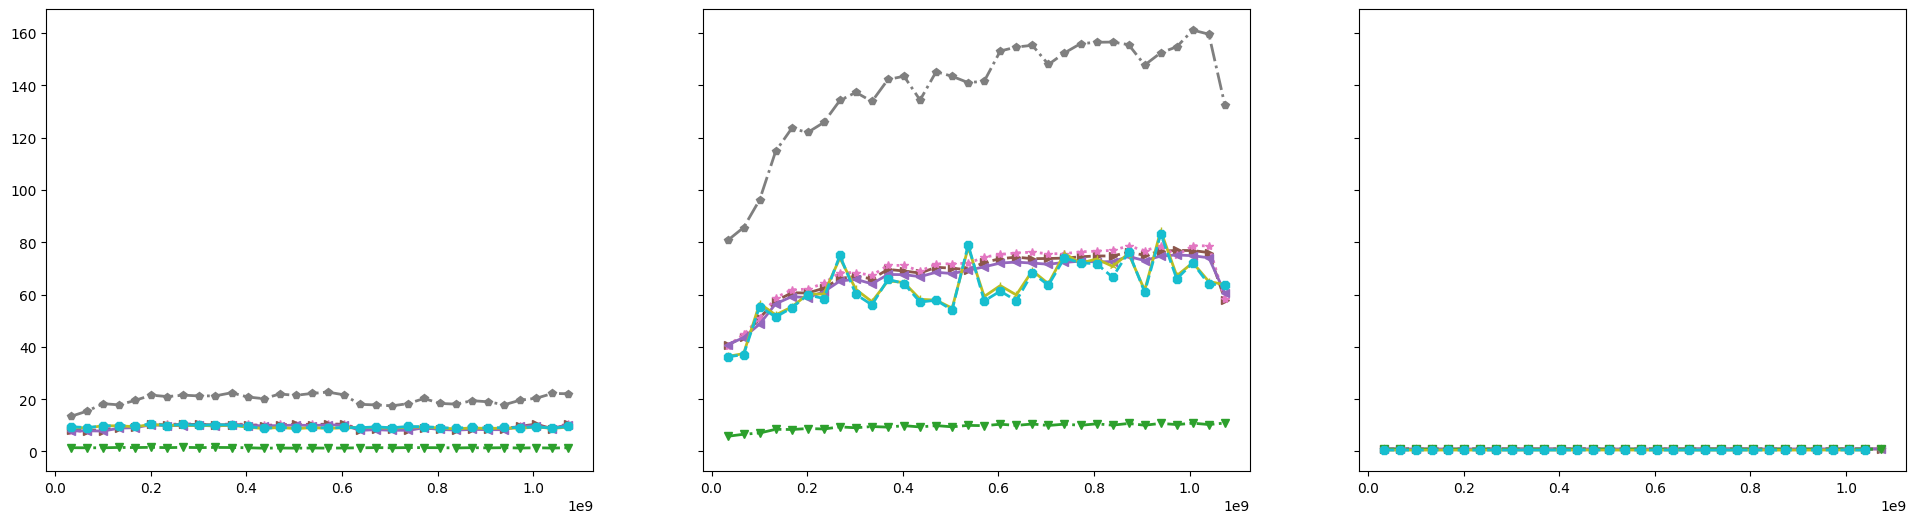

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_normal):
    if label != 'cpu_euclidean':
        y_values = legend_labels_ch_normal[label]
        x_values = numero[:len(y_values)]
        axes[0].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_circumference):
    if label != 'cpu_euclidean':
        y_values = legend_labels_ch_uniform[label]
        x_values = numero[:len(y_values)]
        axes[1].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)
        
# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_circumference):
    if label != 'cpu_euclidean':
        y_values = legend_labels_ch_circumference[label]
        x_values = numero[:len(y_values)]
        axes[2].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)
        
        
plt.show()


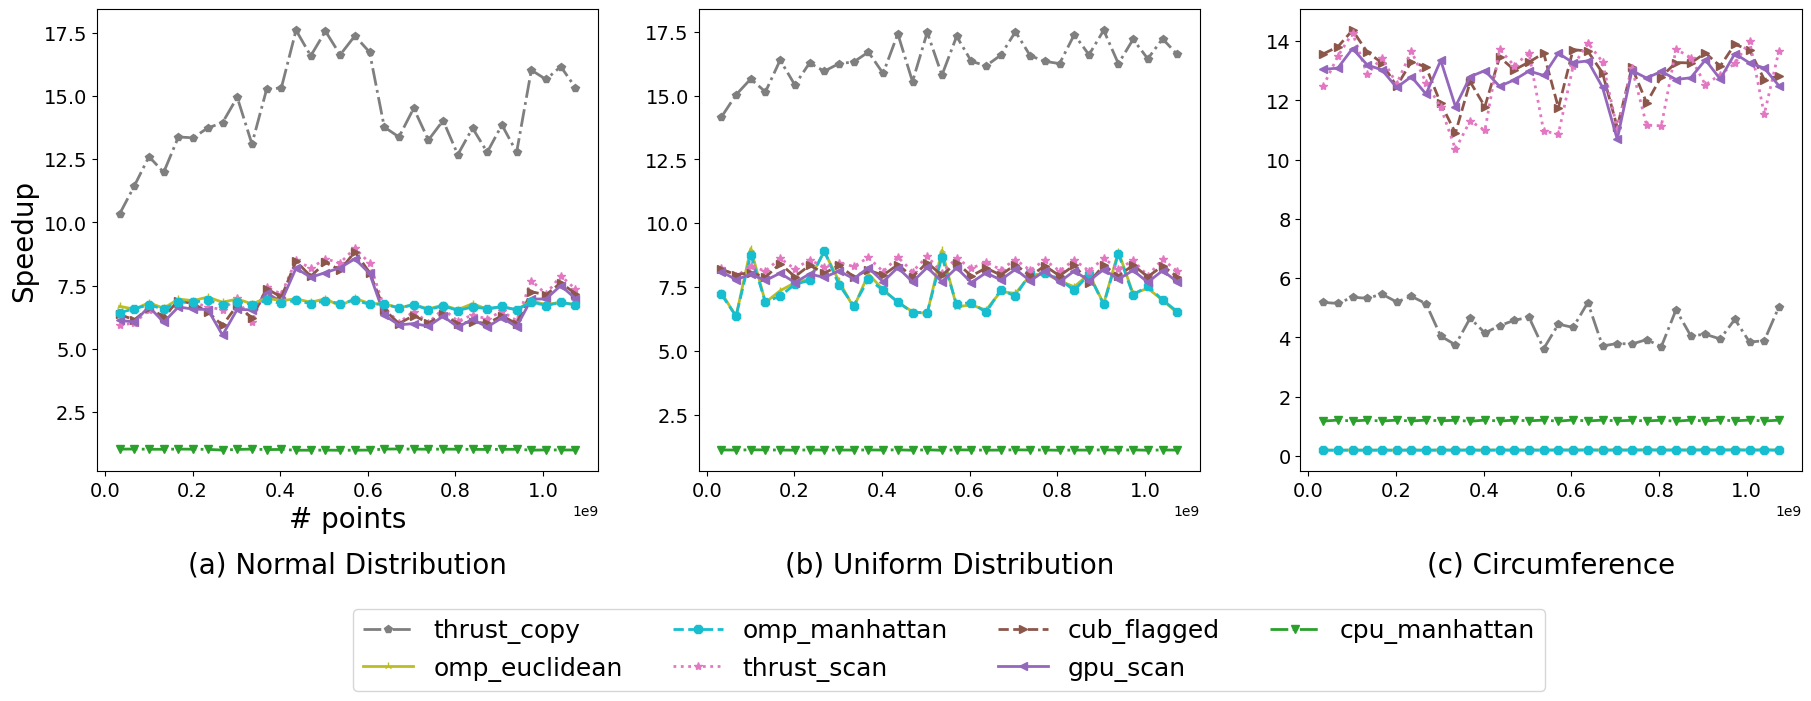

In [93]:
font_size = 20

fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=False)

numero_exp1 = numero

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_normal):
    if label != 'cpu_euclidean':
        y_values = legend_labels_normal[label]
        x_values = numero[:len(y_values)]
        axes[0].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_uniform):
    if label != 'cpu_euclidean':
        y_values = legend_labels_uniform[label]
        x_values = numero[:len(y_values)]
        axes[1].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)
        
# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_circumference):
    if label != 'cpu_euclidean':
        y_values = legend_labels_circumference[label]
        x_values = numero[:len(y_values)]
        axes[2].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)
        
# legend abajo y al centro de la segunda figura
axes[1].legend(bbox_to_anchor=(0.5, -0.27), loc='upper center', ncol=4, fontsize=font_size-2)

axes[0].set_xlabel('# points', fontsize=font_size)
#axes[1].set_xlabel('# points', fontsize=font_size)
axes[0].set_ylabel('Speedup', fontsize=font_size)

axes[0].text(0.5, -0.22, "(a) Normal Distribution", ha='center', transform=axes[0].transAxes, fontsize=font_size)
axes[1].text(0.5, -0.22, "(b) Uniform Distribution", ha='center', transform=axes[1].transAxes, fontsize=font_size)
axes[2].text(0.5, -0.22, "(c) Circumference", ha='center', transform=axes[2].transAxes, fontsize=font_size)

# axis set font size
axes[0].tick_params(axis='both', which='major', labelsize=font_size-6)
axes[1].tick_params(axis='both', which='major', labelsize=font_size-6)
axes[2].tick_params(axis='both', which='major', labelsize=font_size-6)

#plt.tight_layout()

# save plot in a pdf file
plt.savefig('filter_speedup.pdf', bbox_inches='tight')

plt.show()

In [94]:
numero

array([  33554432,   67108864,  100663296,  134217728,  167772160,
        201326592,  234881024,  268435456,  301989888,  335544320,
        369098752,  402653184,  436207616,  469762048,  503316480,
        536870912,  570425344,  603979776,  637534208,  671088640,
        704643072,  738197504,  771751936,  805306368,  838860800,
        872415232,  905969664,  939524096,  973078528, 1006632960,
       1040187392, 1073741824])

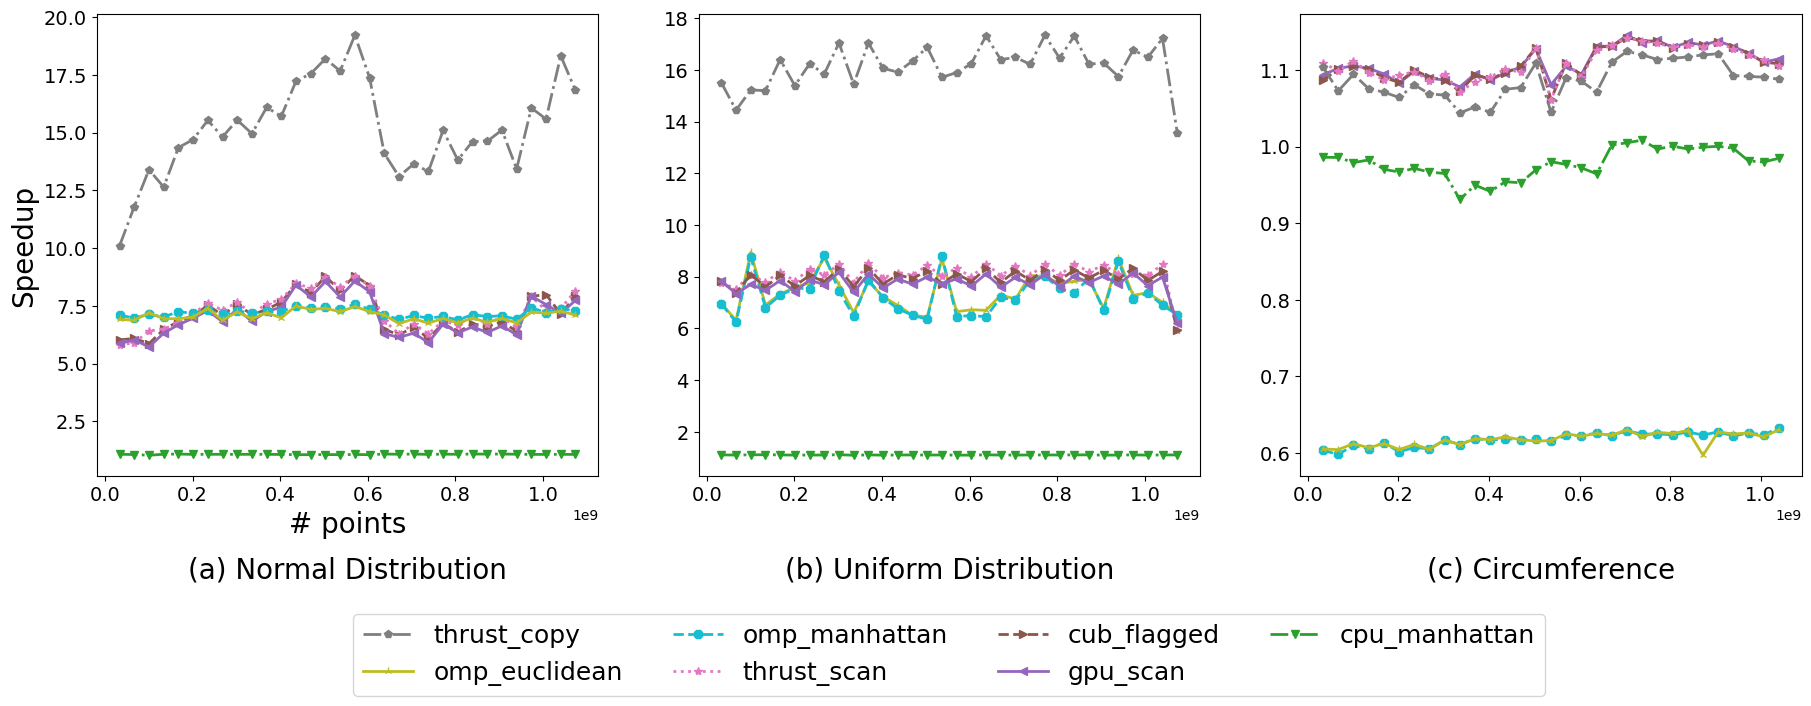

In [95]:
font_size = 20

fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=False)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_normal_e):
    if label != 'cgal_ch_2' and label != 'cudachain' and label != 'cgal_graham_andrew' and label != 'qhull' and label != 'cpu_euclidean':
        y_values = legend_labels_ch_normal_e[label]
        x_values = numero[:len(y_values)]
        axes[0].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_uniform_e):
    if label != 'cgal_ch_2' and label != 'cudachain' and label != 'cgal_graham_andrew' and label != 'qhull' and label != 'cpu_euclidean':
        y_values = legend_labels_ch_uniform_e[label]
        x_values = numero[:len(y_values)]
        axes[1].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)
        
# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference_e):
    if label != 'cgal_ch_2' and label != 'cudachain' and label != 'cgal_graham_andrew' and label != 'qhull' and label != 'cpu_euclidean':
        y_values = legend_labels_ch_circumference_e[label]
        x_values = numero[:len(y_values)]
        axes[2].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)
        
# legend abajo y al centro de la segunda figura
axes[1].legend(bbox_to_anchor=(0.5, -0.27), loc='upper center', ncol=4, fontsize=font_size-2)

axes[0].set_xlabel('# points', fontsize=font_size)
#axes[1].set_xlabel('# points', fontsize=font_size)
axes[0].set_ylabel('Speedup', fontsize=font_size)

axes[0].text(0.5, -0.22, "(a) Normal Distribution", ha='center', transform=axes[0].transAxes, fontsize=font_size)
axes[1].text(0.5, -0.22, "(b) Uniform Distribution", ha='center', transform=axes[1].transAxes, fontsize=font_size)
axes[2].text(0.5, -0.22, "(c) Circumference", ha='center', transform=axes[2].transAxes, fontsize=font_size)

# axis set font size
axes[0].tick_params(axis='both', which='major', labelsize=font_size-6)
axes[1].tick_params(axis='both', which='major', labelsize=font_size-6)
axes[2].tick_params(axis='both', which='major', labelsize=font_size-6)

#plt.tight_layout()

# save plot in a pdf file
plt.savefig('ch_e_speedup.pdf', bbox_inches='tight')

plt.show()

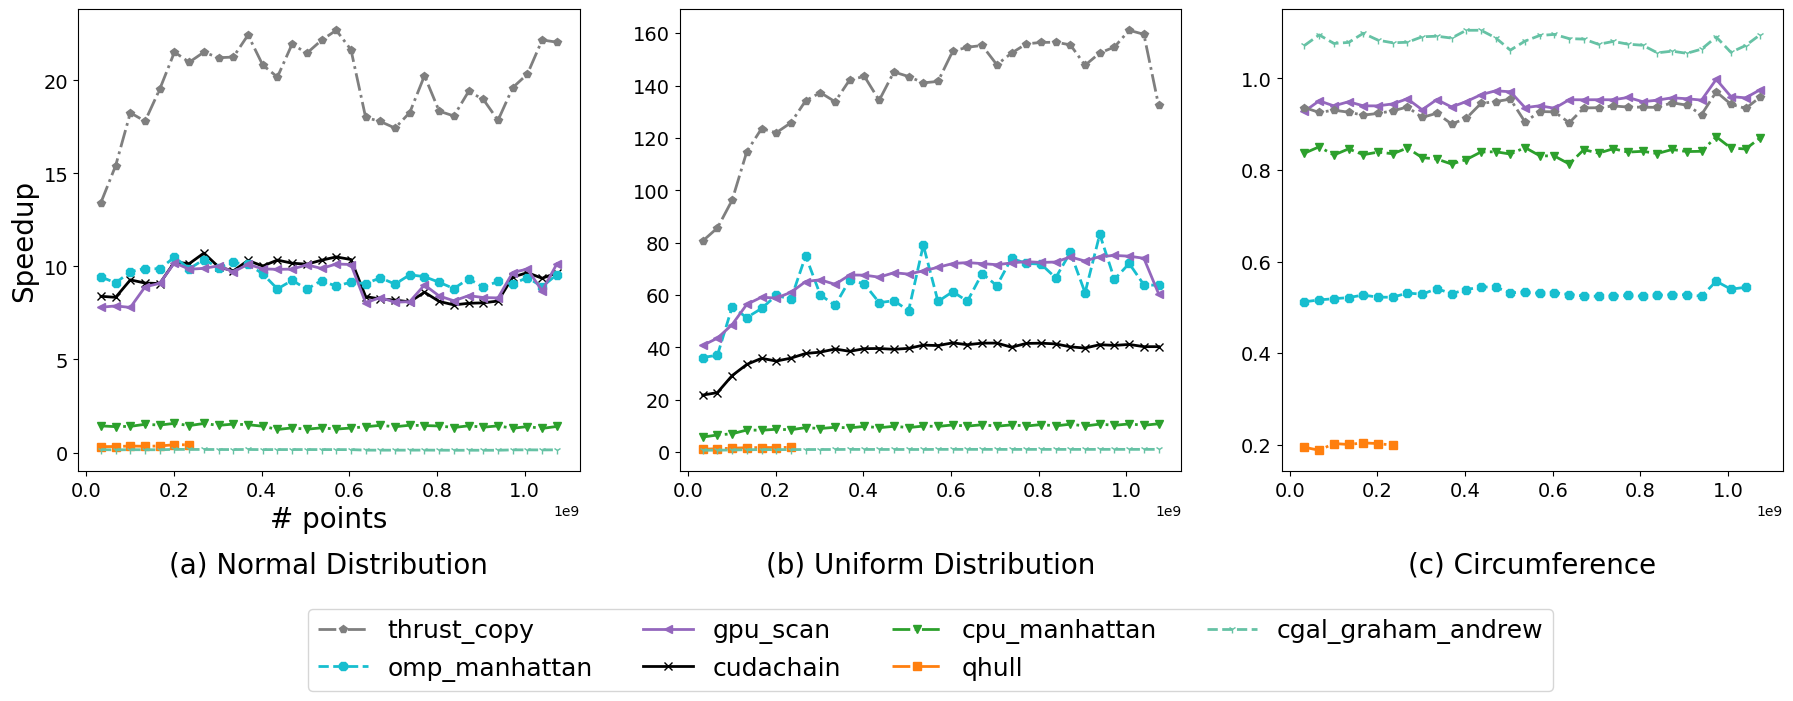

In [96]:
font_size = 20

fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=False)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_normal):
    if label != 'cub_flagged' and label != 'thrust_scan' and label != 'cgal_ch_2' and label != 'cpu_euclidean' and label != 'omp_euclidean':
        y_values = legend_labels_ch_normal[label]
        x_values = numero[:len(y_values)]
        axes[0].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_uniform):
    if label != 'cub_flagged' and label != 'thrust_scan' and label != 'cgal_ch_2' and label != 'cpu_euclidean' and label != 'omp_euclidean':
        y_values = legend_labels_ch_uniform[label]
        x_values = numero[:len(y_values)]
        axes[1].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)
        
# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference):
    if label != 'cub_flagged' and label != 'thrust_scan' and label != 'cgal_ch_2' and label != 'cpu_euclidean' and label != 'omp_euclidean':
        y_values = legend_labels_ch_circumference[label]
        x_values = numero[:len(y_values)]
        axes[2].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)
        
# legend abajo y al centro de la segunda figura
axes[1].legend(bbox_to_anchor=(0.5, -0.27), loc='upper center', ncol=4, fontsize=font_size-2)

axes[0].set_xlabel('# points', fontsize=font_size)
#axes[1].set_xlabel('# points', fontsize=font_size)
axes[0].set_ylabel('Speedup', fontsize=font_size)

axes[0].text(0.5, -0.22, "(a) Normal Distribution", ha='center', transform=axes[0].transAxes, fontsize=font_size)
axes[1].text(0.5, -0.22, "(b) Uniform Distribution", ha='center', transform=axes[1].transAxes, fontsize=font_size)
axes[2].text(0.5, -0.22, "(c) Circumference", ha='center', transform=axes[2].transAxes, fontsize=font_size)

# axis set font size
axes[0].tick_params(axis='both', which='major', labelsize=font_size-6)
axes[1].tick_params(axis='both', which='major', labelsize=font_size-6)
axes[2].tick_params(axis='both', which='major', labelsize=font_size-6)

#plt.tight_layout()

# save plot in a pdf file
plt.savefig('ch_speedup.pdf', bbox_inches='tight')

plt.show()

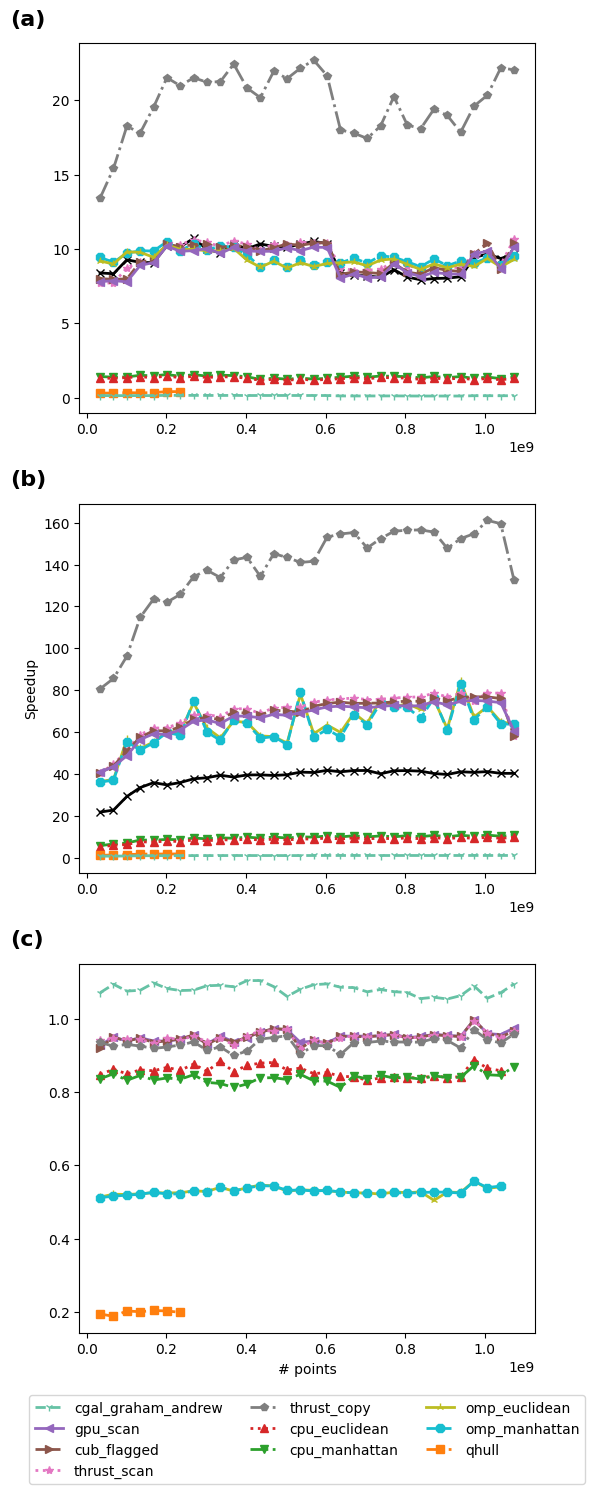

In [97]:
fig, axes = plt.subplots(3, 1, figsize=(6, 15), sharey=False)


# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_normal):
    if label != 'cgal_ch_2':
        y_values = legend_labels_ch_normal[label]
        x_values = numero[:len(y_values)]
        axes[0].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_uniform):
    if label != 'cgal_ch_2':
        y_values = legend_labels_ch_uniform[label]
        x_values = numero[:len(y_values)]
        axes[1].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)
        
# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference):
    if label != 'cgal_ch_2':
        y_values = legend_labels_ch_circumference[label]
        x_values = numero[:len(y_values)]
        axes[2].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
                 linestyle=line_styles[label], marker=markers[label], **marker_style)

letras = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axes):
    ax.annotate(letras[i], xy=(0, 1), xytext=(-50, 10), fontsize=16, fontweight='bold',
                xycoords='axes fraction', textcoords='offset points', ha='left', va='bottom')
      
axes[2].legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)

axes[2].set_xlabel('# points')
#axes[2].set_ylabel('Speedup')
axes[1].set_ylabel('Speedup')
#axes[0].set_ylabel('Speedup')

#axes[0].text(0.5, -0.25, "(a) Normal Distribution", ha='center', transform=axes[0].transAxes)
#axes[1].text(0.5, -0.25, "(b) Uniform Distribution", ha='center', transform=axes[1].transAxes)
#axes[2].text(0.5, -0.25, "(c) Circumfernce", ha='center', transform=axes[2].transAxes)

plt.tight_layout()

plt.show()

In [98]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_prob_7_f.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_graham_andrew = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []
omp_euclidean = []
omp_manhattan = []
cudachain = []
qhull = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(float(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_graham_andrew.append(float(datos[5]))
        cpu_manhattan.append(float(datos[9]))
        cpu_euclidean.append(float(datos[13]))
        gpu_scan.append(float(datos[17]))
        cub_flagged.append(float(datos[21]))
        thrust_scan.append(float(datos[25]))
        thrust_copy.append(float(datos[29]))
        omp_manhattan.append(float(datos[33]))
        omp_euclidean.append(float(datos[37]))


# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cpu_euclidean = np.array(cpu_euclidean)
cgal_ch_2 = np.array(cgal_ch_2)
cgal_graham_andrew = np.array(cgal_graham_andrew)
cpu_manhattan = np.array(cpu_manhattan)
gpu_scan = np.array(gpu_scan)
cub_flagged = np.array(cub_flagged)
thrust_scan = np.array(thrust_scan)
thrust_copy = np.array(thrust_copy)
omp_manhattan = np.array(omp_manhattan)
omp_euclidean = np.array(omp_euclidean)
#cudachain = cpu_euclidean[:len(cudachain)] / np.array(cudachain[:len(cpu_euclidean)])
#qhull = cpu_euclidean[:len(qhull)] / np.array(qhull)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_circumference_prob_7 = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_graham_andrew': cgal_graham_andrew,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan,
    #'cudachain' : cudachain,
    #'qhull' : qhull
}         
            
# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_circumference_prob_7 = sorted(legend_labels_ch_circumference_prob_7, key=lambda x: np.max(legend_labels_ch_circumference_prob_7[x]), reverse=True)

In [99]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_prob_9_f.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_graham_andrew = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []
omp_euclidean = []
omp_manhattan = []
cudachain = []
qhull = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(float(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_graham_andrew.append(float(datos[5]))
        cpu_manhattan.append(float(datos[9]))
        cpu_euclidean.append(float(datos[13]))
        gpu_scan.append(float(datos[17]))
        cub_flagged.append(float(datos[21]))
        thrust_scan.append(float(datos[25]))
        thrust_copy.append(float(datos[29]))
        omp_manhattan.append(float(datos[33]))
        omp_euclidean.append(float(datos[37]))


# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cpu_euclidean = np.array(cpu_euclidean)
cgal_ch_2 = np.array(cgal_ch_2)
cgal_graham_andrew = np.array(cgal_graham_andrew)
cpu_manhattan = np.array(cpu_manhattan)
gpu_scan = np.array(gpu_scan)
cub_flagged = np.array(cub_flagged)
thrust_scan = np.array(thrust_scan)
thrust_copy = np.array(thrust_copy)
omp_manhattan = np.array(omp_manhattan)
omp_euclidean = np.array(omp_euclidean)
#cudachain = cpu_euclidean[:len(cudachain)] / np.array(cudachain[:len(cpu_euclidean)])
#qhull = cpu_euclidean[:len(qhull)] / np.array(qhull)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_circumference_prob_9 = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_graham_andrew': cgal_graham_andrew,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan,
    #'cudachain' : cudachain,
    #'qhull' : qhull
}         
            
# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_circumference_prob_9 = sorted(legend_labels_ch_circumference_prob_9, key=lambda x: np.max(legend_labels_ch_circumference_prob_9[x]), reverse=True)

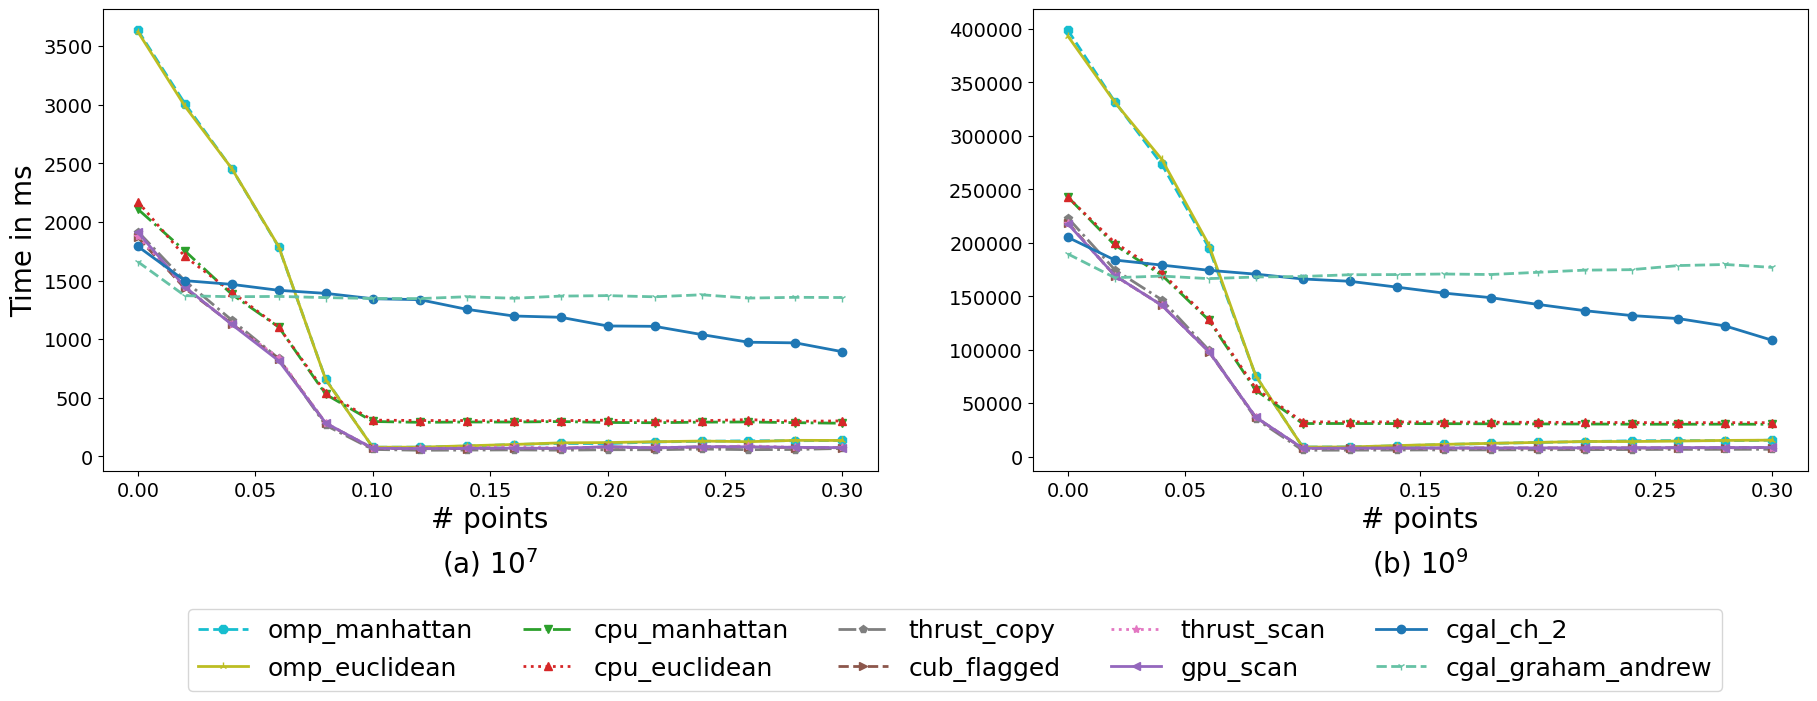

In [100]:
font_size = 20

fig, axes = plt.subplots(1, 2, figsize=(22, 6), sharey=False)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference_prob_9):
    y_values = legend_labels_ch_circumference_prob_7[label]
    x_values = numero[:len(y_values)]
    axes[0].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
        linestyle=line_styles[label], marker=markers[label], **marker_style)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference_prob_9):
    y_values = legend_labels_ch_circumference_prob_9[label]
    x_values = numero[:len(y_values)]
    axes[1].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
        linestyle=line_styles[label], marker=markers[label], **marker_style)
        
# legend abajo y al centro de la segunda figura
axes[0].legend(bbox_to_anchor=(1.1, -0.27), loc='upper center', ncol=5, fontsize=font_size-2)

axes[0].set_xlabel('# points', fontsize=font_size)
axes[1].set_xlabel('# points', fontsize=font_size)
axes[0].set_ylabel('Time in ms', fontsize=font_size)

axes[0].text(0.5, -0.22, "(a) $10^7$", ha='center', transform=axes[0].transAxes, fontsize=font_size)
axes[1].text(0.5, -0.22, "(b) $10^9$", ha='center', transform=axes[1].transAxes, fontsize=font_size)

# axis set font size
axes[0].tick_params(axis='both', which='major', labelsize=font_size-6)
axes[1].tick_params(axis='both', which='major', labelsize=font_size-6)

#plt.tight_layout()

# save plot in a pdf file
plt.savefig('ch_time_prob.pdf', bbox_inches='tight')

plt.show()

In [101]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_prob_7_f.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_graham_andrew = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []
omp_euclidean = []
omp_manhattan = []
cudachain = []
qhull = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(float(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_graham_andrew.append(float(datos[5]))
        cpu_manhattan.append(float(datos[9]))
        cpu_euclidean.append(float(datos[13]))
        gpu_scan.append(float(datos[17]))
        cub_flagged.append(float(datos[21]))
        thrust_scan.append(float(datos[25]))
        thrust_copy.append(float(datos[29]))
        omp_manhattan.append(float(datos[33]))
        omp_euclidean.append(float(datos[37]))


# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cgal_ch_2 = np.array(cgal_ch_2)
cpu_euclidean = cgal_ch_2 / np.array(cpu_euclidean)
cgal_graham_andrew = cgal_ch_2 / np.array(cgal_graham_andrew)
cpu_manhattan = cgal_ch_2 / np.array(cpu_manhattan)
gpu_scan = cgal_ch_2 / np.array(gpu_scan)
cub_flagged = cgal_ch_2 / np.array(cub_flagged)
thrust_scan = cgal_ch_2 / np.array(thrust_scan)
thrust_copy = cgal_ch_2 / np.array(thrust_copy)
omp_manhattan = cgal_ch_2 / np.array(omp_manhattan)
omp_euclidean = cgal_ch_2 / np.array(omp_euclidean)
#cudachain = cpu_euclidean[:len(cudachain)] / np.array(cudachain[:len(cpu_euclidean)])
#qhull = cpu_euclidean[:len(qhull)] / np.array(qhull)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_circumference_prob_7_e = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_graham_andrew': cgal_graham_andrew,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan,
    #'cudachain' : cudachain,
    #'qhull' : qhull
}         
            
# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_circumference_prob_7_e = sorted(legend_labels_ch_circumference_prob_7_e, key=lambda x: np.max(legend_labels_ch_circumference_prob_7_e[x]), reverse=True)

In [102]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_prob_9_f.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_graham_andrew = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []
omp_euclidean = []
omp_manhattan = []
cudachain = []
qhull = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(float(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_graham_andrew.append(float(datos[5]))
        cpu_manhattan.append(float(datos[9]))
        cpu_euclidean.append(float(datos[13]))
        gpu_scan.append(float(datos[17]))
        cub_flagged.append(float(datos[21]))
        thrust_scan.append(float(datos[25]))
        thrust_copy.append(float(datos[29]))
        omp_manhattan.append(float(datos[33]))
        omp_euclidean.append(float(datos[37]))


# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cgal_ch_2 = np.array(cgal_ch_2)
cpu_euclidean = cgal_ch_2 / np.array(cpu_euclidean)
cgal_graham_andrew = cgal_ch_2 / np.array(cgal_graham_andrew)
cpu_manhattan = cgal_ch_2 / np.array(cpu_manhattan)
gpu_scan = cgal_ch_2 / np.array(gpu_scan)
cub_flagged = cgal_ch_2 / np.array(cub_flagged)
thrust_scan = cgal_ch_2 / np.array(thrust_scan)
thrust_copy = cgal_ch_2 / np.array(thrust_copy)
omp_manhattan = cgal_ch_2 / np.array(omp_manhattan)
omp_euclidean = cgal_ch_2 / np.array(omp_euclidean)
#cudachain = cpu_euclidean[:len(cudachain)] / np.array(cudachain[:len(cpu_euclidean)])
#qhull = cpu_euclidean[:len(qhull)] / np.array(qhull)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_circumference_prob_9_e = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_graham_andrew': cgal_graham_andrew,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan,
    #'cudachain' : cudachain,
    #'qhull' : qhull
}         
            
# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_circumference_prob_9_e = sorted(legend_labels_ch_circumference_prob_9_e, key=lambda x: np.max(legend_labels_ch_circumference_prob_9_e[x]), reverse=True)

In [103]:
numero_exp2 = numero

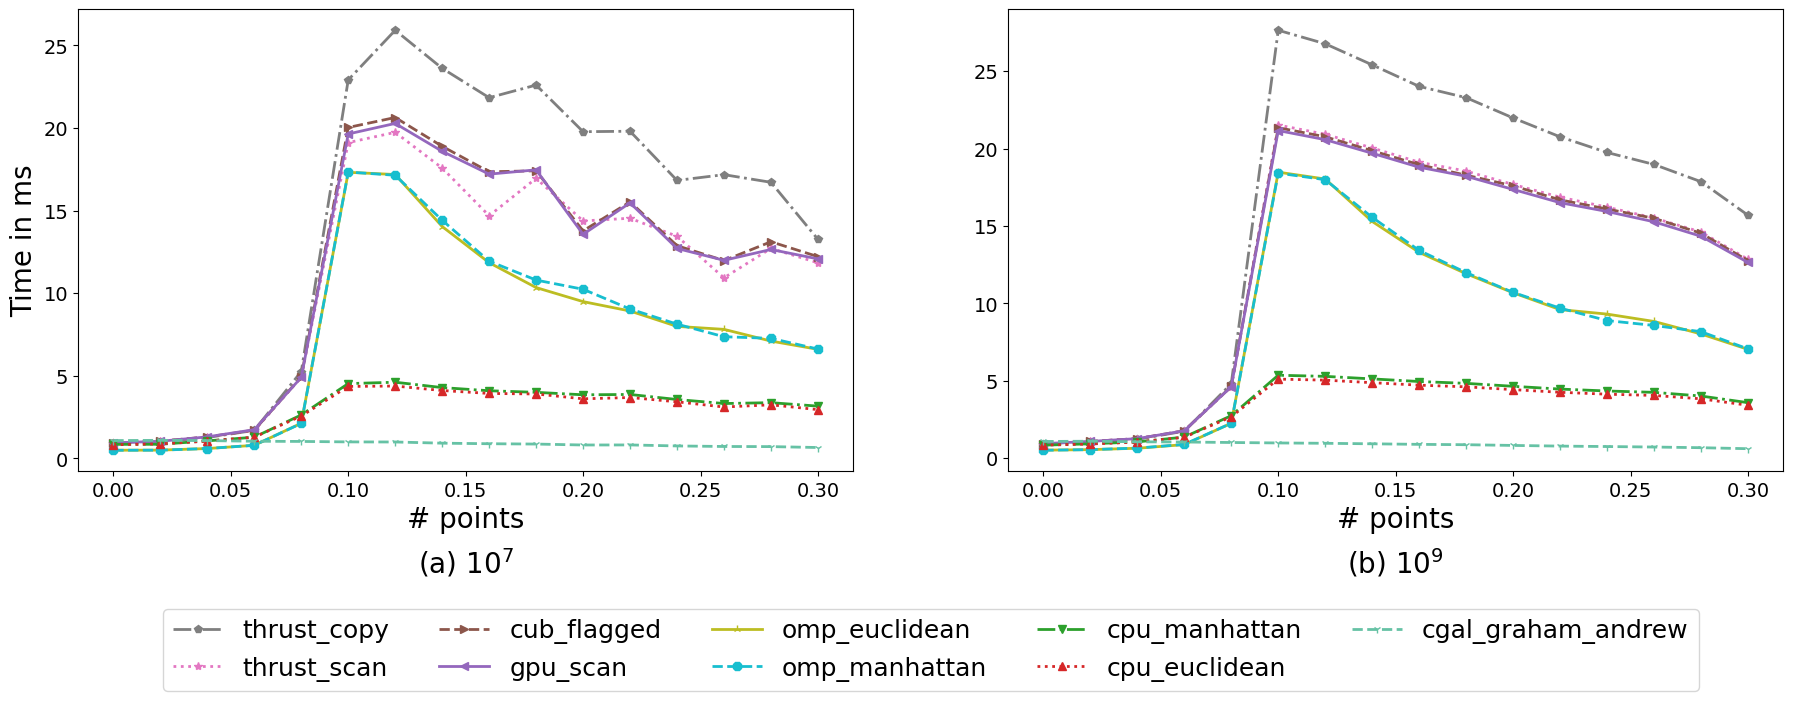

In [104]:
font_size = 20

fig, axes = plt.subplots(1, 2, figsize=(22, 6), sharey=False)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference_prob_9_e):
    if label != 'cgal_ch_2': 
        y_values = legend_labels_ch_circumference_prob_7_e[label]
        x_values = numero[:len(y_values)]
        axes[0].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
            linestyle=line_styles[label], marker=markers[label], **marker_style)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference_prob_9_e):
    if label != 'cgal_ch_2':
        y_values = legend_labels_ch_circumference_prob_9_e[label]
        x_values = numero[:len(y_values)]
        axes[1].plot(x_values, y_values, label=label, color=color_mapping[label], linewidth=2,
            linestyle=line_styles[label], marker=markers[label], **marker_style)
        
# legend abajo y al centro de la segunda figura
axes[0].legend(bbox_to_anchor=(1.1, -0.27), loc='upper center', ncol=5, fontsize=font_size-2)

axes[0].set_xlabel('# points', fontsize=font_size)
axes[1].set_xlabel('# points', fontsize=font_size)
axes[0].set_ylabel('Time in ms', fontsize=font_size)

axes[0].text(0.5, -0.22, "(a) $10^7$", ha='center', transform=axes[0].transAxes, fontsize=font_size)
axes[1].text(0.5, -0.22, "(b) $10^9$", ha='center', transform=axes[1].transAxes, fontsize=font_size)
# axis set font size
axes[0].tick_params(axis='both', which='major', labelsize=font_size-6)
axes[1].tick_params(axis='both', which='major', labelsize=font_size-6)

#plt.tight_layout()

# save plot in a pdf file
plt.savefig('ch_speedup_prob.pdf', bbox_inches='tight')

plt.show()

# export data

In [105]:
# export legend_labels_normal to a csv file
import csv
'''
with open('ch_speedup_prob.csv', 'w') as f:
    for key in legend_labels_normal.keys():
        f.write("%s,%s\n"%(key,legend_labels_normal[key]))
'''

import csv
import numpy as np



def export_to_csv(file_path, data_dict, numero, exclude_columns=None):
    with open(file_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write the header (column names) including the 'numero' column
        header = ['numero'] + [key for key in data_dict.keys() if key not in exclude_columns]
        csv_writer.writerow(header)

        # Find the maximum length of the data rows
        max_length = max(len(data_dict[key]) for key in data_dict.keys() if key not in exclude_columns)

        # Write the data rows including the 'numero' column
        for i in range(max_length):
            row_data = [numero[i]]
            for key in data_dict.keys():
                if key not in exclude_columns:
                    if i < len(data_dict[key]):
                        row_data.append(data_dict[key][i])
                    else:
                        row_data.append(None)  # Add a placeholder for missing values
            csv_writer.writerow(row_data)

csv_file_path = 'ch_speedup_prob.csv'
exclude_column = 'cpu_euclidean'
#export_to_csv(csv_file_path, legend_labels_normal, numero_exp1, exclude_column)

In [106]:
exclude_column = 'cpu_euclidean'
export_to_csv('2d_filter_normal.csv', legend_labels_normal, numero_exp1, exclude_column)
export_to_csv('2d_filter_uniform.csv', legend_labels_uniform, numero_exp1, exclude_column)
export_to_csv('2d_filter_circumference.csv', legend_labels_circumference, numero_exp1, exclude_column)

In [107]:
exclude_column = [
    'cub_flagged',
    'thrust_scan',
    'cgal_ch_2',
    'cpu_euclidean',
    'omp_euclidean'
]

export_to_csv('2d_filter_ch_normal.csv', legend_labels_ch_normal, numero_exp1, exclude_column)
export_to_csv('2d_filter_ch_uniform.csv', legend_labels_ch_uniform, numero_exp1, exclude_column)
export_to_csv('2d_filter_ch_circumference.csv', legend_labels_ch_circumference, numero_exp1, exclude_column)


In [108]:
legend_labels_ch_normal['qhull']

array([0.31751384, 0.32085973, 0.34857904, 0.33304897, 0.35091589,
       0.41858826, 0.41375896])

In [111]:
legend_labels_normal

{'cpu_manhattan': array([1.03841379, 1.04120006, 1.03245538, 1.0306655 , 1.04021664,
        1.0332006 , 1.02909979, 1.0000345 , 1.02569291, 1.03766073,
        1.01941028, 1.02499647, 0.99496648, 0.99511379, 0.99895245,
        0.99296144, 0.99557617, 1.00023405, 1.03954362, 1.04398057,
        1.03877358, 1.03227157, 1.03723085, 1.03333805, 1.02807526,
        1.02618156, 1.02856338, 1.03124645, 0.99721533, 1.00623581,
        1.00459962, 1.00462655]),
 'cpu_euclidean': array([  564.4992372,  1143.9313476,  1802.2675415,  2270.6065186,
         3017.0672363,  3807.6812745,  4739.2041015,  5013.2644531,
         6052.6918945,  6354.2507814,  7466.2112305,  8134.2925782,
        10026.2717774, 10149.9969727, 11593.234375 , 11594.9809571,
        13060.6669922, 13052.2414063, 11246.4756835, 11216.4150391,
        12491.9257811, 12234.71875  , 13643.013379 , 13364.7713869,
        14690.7106445, 14381.1369141, 15859.7724609, 15534.9893555,
        20206.0695314, 19730.4951171, 21667.4480

In [120]:
exclude_column = 'cgal_ch_2'
export_to_csv('2d_prob_9.csv', legend_labels_ch_circumference_prob_9_e, numero_exp2, exclude_column)

In [118]:
legend_labels_ch_circumference_prob_9_e

{'cgal_ch_2': array([205166.2109375 , 183925.        , 179207.87890625, 174350.11328125,
        170743.48046875, 166236.44140625, 164083.64453125, 158627.80078125,
        153052.8671875 , 148769.8671875 , 142462.8515625 , 136592.9609375 ,
        132018.62109375, 129160.2617185 , 122229.86328125, 108832.44531225]),
 'cgal_graham_andrew': array([1.08188807, 1.09856953, 1.0607723 , 1.046871  , 1.01586442,
        0.98621309, 0.96418005, 0.93119977, 0.8957155 , 0.87309943,
        0.82612835, 0.78284418, 0.75470296, 0.72249985, 0.67993454,
        0.61474226]),
 'cpu_manhattan': array([0.84486282, 0.9294309 , 1.05526215, 1.36476651, 2.74846368,
        5.36047442, 5.28845212, 5.1237232 , 4.95572985, 4.83583387,
        4.646463  , 4.46701673, 4.34322496, 4.25591984, 4.01811338,
        3.58939453]),
 'cpu_euclidean': array([0.84530856, 0.91881849, 1.04273211, 1.35350039, 2.67517889,
        5.109971  , 5.04386553, 4.87990721, 4.71951139, 4.61119527,
        4.43137172, 4.25997485, 4.136